___

In [1]:
# Import libraries to be used

# Directories/Files management
import os.path

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
## pd.set_option('display.max_rows', None) # It greatly slows down the output display and may freeze the kernel
import missingno as msno
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning:
# - Model selection:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold, cross_val_score, StratifiedKFold, \
                                    GridSearchCV, RandomizedSearchCV
from sklearn.inspection import permutation_importance

# - Basic classes for custom-made transformers:
from sklearn.base import BaseEstimator, TransformerMixin

# - Transformers:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# - Pipeline:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# - Models:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance, plot_tree

# - Metrics:
from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score, \
                            confusion_matrix, classification_report, roc_curve, precision_recall_curve, \
                            roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

# Objects storage:
from joblib import dump, load
import pickle

# Model explainability:
import shap

In [2]:
t0 = time.perf_counter() 

In [3]:
# Detect Operating System running and manage paths accordingly

root = os.getcwd()
if os.name == 'nt': # Windows
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\Desktop\TFM\notebooks\model\shap


___

# Load the dataset

In [4]:
cols = [
    'MONTH',
#     'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
#     'TAIL_NUM',
    'ORIGIN',
#     'ORIGIN_CITY_NAME',
#     'ORIGIN_STATE_ABR',
#     'ORIGIN_STATE_NM',
#     'WBAN_Origin_OTP',
    'DEST',
#     'DEST_CITY_NAME',
#     'DEST_STATE_ABR',
#     'DEST_STATE_NM',
#     'WBAN_Dest_OTP',
#     'CRS_DEP_TIME',
#     'DEP_TIME',
#     'DEP_DELAY',
#     'DEP_DEL15',
    'DEP_TIME_hour',
#     'TAXI_OUT',
#     'TAXI_IN',
    'TAXI_OUT_median',
    'TAXI_IN_median',
#     'CRS_ARR_TIME',
#     'ARR_TIME',
#     'ARR_DELAY',
    'ARR_DEL15', # → Target !!
    'ARR_TIME_hour',
#     'CANCELLED',
#     'CRS_ELAPSED_TIME',
    'DISTANCE',
#     'DISTANCE_GROUP',
#     'CARRIER_DELAY',
#     'WEATHER_DELAY',
#     'NAS_DELAY',
#     'SECURITY_DELAY',
#     'LATE_AIRCRAFT_DELAY',
    
#     'STATION_Origin',
#     'WMO_Origin',
#     'WBAN_Origin_LCD',
#     'LATITUDE_Origin',
#     'LONGITUDE_Origin',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
#     'HourlyWindDirection_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
#     'REM_Origin',
#     'STATION_Dest',
#     'WMO_Dest',
#     'WBAN_Dest_LCD',
#     'LATITUDE_Dest',
#     'LONGITUDE_Dest',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
#     'HourlyWindDirection_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest',
#     'REM_Dest'
]

In [5]:
cols_dtypes = {
    'MONTH' : 'string',
#     'DAY_OF_MONTH' : 'string',
    'DAY_OF_WEEK' : 'string',
    'OP_UNIQUE_CARRIER' : 'string',
#     'TAIL_NUM' : 'string',
    'ORIGIN' : 'string',
#     'ORIGIN_CITY_NAME' : 'string',
#     'ORIGIN_STATE_ABR' : 'string',
#     'ORIGIN_STATE_NM' : 'string',
#     'WBAN_Origin_OTP' : 'string',
    'DEST' : 'string',
#     'DEST_CITY_NAME' : 'string',
#     'DEST_STATE_ABR' : 'string',
#     'DEST_STATE_NM' : 'string',
#     'WBAN_Dest_OTP' : 'string',
#     'CRS_DEP_TIME' : 'string',
#     'DEP_TIME' : 'string',
#     'DEP_DELAY' : 'int32',
#     'DEP_DEL15' : 'int32',
    'DEP_TIME_hour' : 'string',
#     'TAXI_OUT' : 'int32',
#     'TAXI_IN' : 'int32',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
#     'CRS_ARR_TIME' : 'string',
#     'ARR_TIME' : 'string',
#     'ARR_DELAY' : 'int32',
    'ARR_DEL15' : 'int32', # → Target !!
    'ARR_TIME_hour' : 'string',
#     'CANCELLED' : 'string',
#     'CRS_ELAPSED_TIME' : 'int32',
    'DISTANCE' : 'int32',
#     'DISTANCE_GROUP' : 'string',
#     'CARRIER_DELAY' : 'int32',
#     'WEATHER_DELAY' : 'int32',
#     'NAS_DELAY' : 'int32',
#     'SECURITY_DELAY' : 'int32',
#     'LATE_AIRCRAFT_DELAY' : 'int32',

#     'STATION_Origin' : 'string',
#     'WMO_Origin' : 'string',
#     'WBAN_Origin_LCD' : 'string',
#     'LATITUDE_Origin' : 'float64',
#     'LONGITUDE_Origin' : 'float64',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'int32',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'int32',
    'HourlySkyConditions_Origin' : 'string',
    'HourlyVisibility_Origin' : 'int32',
#     'HourlyWindDirection_Origin' : 'string',
    'HourlyWindGustSpeed_Origin' : 'int32',
    'HourlyWindSpeed_Origin' : 'int32',
#     'REM_Origin' : 'string',
#     'STATION_Dest' : 'string',
#     'WMO_Dest' : 'string',
#     'WBAN_Dest_LCD' : 'string',
#     'LATITUDE_Dest' : 'float64',
#     'LONGITUDE_Dest' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'int32',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'int32',
    'HourlySkyConditions_Dest' : 'string',
    'HourlyVisibility_Dest' : 'int32',
#     'HourlyWindDirection_Dest' : 'string',
    'HourlyWindGustSpeed_Dest' : 'int32',
    'HourlyWindSpeed_Dest' : 'int32',
#     'REM_Dest' : 'string',
}

In [6]:
%%time

input_folder = '../../../data/output/us_dot-noaa/'
file_name = "3_otp_lcd_2019.csv"

df = pd.read_csv(input_folder + file_name,
                     encoding='latin1',
#                      nrows=1e5,
                     usecols=cols,
                     dtype=cols_dtypes
                    )
df.sample(5)

Wall time: 1min 34s


,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_DEL15,ARR_TIME_hour,DISTANCE,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
5509648,01,3,WN,HOU,DAL,8,9,4,0,9,239,30.29,56,0.0,77,OVC,10,0,7,30.220,50,0.00,93,OVC,1,0,8
3151682,02,5,WN,DAL,MEM,13,10,4,0,14,423,29.94,49,0.0,93,OVC,5,0,5,30.130,50,0.12,100,OVC,5,0,7
2753961,07,1,AA,DFW,SMF,18,16,5,1,20,1431,29.93,83,0.0,59,OVC,9,0,16,29.910,69,0.00,55,CLR,10,0,10
2849396,09,4,AA,AUS,PHX,15,13,6,0,15,872,30.00,96,0.0,31,FEW,10,0,3,29.850,102,0.00,10,FEW,10,0,6
2501142,01,3,NK,BWI,BOS,6,12,8,1,7,369,30.33,32,0.0,41,OVC,10,0,6,30.375,24,0.00,60,OVC,9,0,8


# Model Interpretability: `shap`

Be careful to interpret the Shapley value correctly: The Shapley value is the average contribution of a feature value to the prediction in different coalitions. The Shapley value is NOT the difference in prediction when we would remove the feature from the model.

The interpretation of the Shapley value is: Given the current set of feature values, the contribution of a feature value to the difference between the actual prediction and the mean prediction is the estimated Shapley value.

## Load the model

In [7]:
# Load model from file:
pipe = load("../XGBoost_pipeline_model.joblib.dat")
print("Loaded model from: XGBoost_pipeline_model.joblib.dat")

Loaded model from: XGBoost_pipeline_model.joblib.dat


In [8]:
# Separate input features from the target:
X = df.drop('ARR_DEL15', axis=1)
y = df['ARR_DEL15']

# Train-test split the data in a stratified way in accordance with target distribution:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5760042, 26), (1440011, 26), (5760042,), (1440011,))

## `TreeExplainer`

### Summary plot

https://github.com/slundberg/shap  
https://slundberg.github.io/shap/notebooks/NHANES%20I%20Survival%20Model.html

- Every flight has one dot on each row
- The `x` position of the dot is the impact of that feature on the model's prediction for the flight
- The color of the dot represents the value of that feature for the flight. Dots that don't fit on the row pile up to show density. Since the XGBoost model has a logistic loss the x-axis has units of log-odds (Tree SHAP explains the change in the margin output of the model).

In [9]:
transformer = pipe[:-1]
model = pipe.named_steps['clf']

In [10]:
# Indicate numerical and categorical features:
num_attribs = X.select_dtypes('number').columns
cat_attribs = X.select_dtypes(['string', 'category', 'object']).columns

# Transform categorical variables:
X_test_categTransformed_df = pd.DataFrame(transformer.transform(X_test)[:, 0:9],
                                          columns=cat_attribs, index=X_test.index)

# Concatenate categorical transformed features with 'as-is' numerical features:
X_test_transformed = pd.concat([X_test_categTransformed_df, X_test[num_attribs]], axis=1)
X_test_transformed = X_test_transformed[X.columns]
X_test_transformed

,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,DISTANCE,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
2881823,0.140451,0.193357,0.175690,0.142831,0.183366,0.268032,10,3,0.264832,417,29.890,73,0.0,62,0.162082,10,0,10,29.920,71,0.0,87,0.173978,10,0,3
410567,0.204860,0.197904,0.213513,0.219986,0.141877,0.156831,21,7,0.239090,2139,30.055,56,0.0,87,0.210787,8,0,11,30.010,39,0.0,57,0.191470,10,0,17
5092151,0.182505,0.199943,0.213513,0.219986,0.173811,0.182829,21,6,0.171102,651,29.920,65,0.0,59,0.178935,10,0,22,29.820,97,0.0,6,0.163726,10,17,10
241143,0.210562,0.187341,0.197953,0.194947,0.162194,0.098087,16,13,0.111150,91,30.060,69,0.0,81,0.153981,10,0,7,29.970,78,0.0,74,0.191470,10,0,6
789756,0.185706,0.197904,0.175690,0.210073,0.155468,0.226031,13,4,0.239090,787,30.170,77,0.0,47,0.178935,10,16,5,30.340,34,0.0,61,0.191470,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385481,0.166527,0.179067,0.175690,0.192987,0.173991,0.216778,10,5,0.187759,239,29.900,93,0.0,40,0.178935,10,24,18,29.950,89,0.0,57,0.173978,10,0,18
1828077,0.206686,0.199943,0.209758,0.256715,0.206126,0.191989,20,4,0.171102,109,30.140,72,0.0,38,0.195033,10,0,6,30.150,72,0.0,40,0.191470,10,0,7
301593,0.140451,0.193357,0.197953,0.178614,0.187192,0.226031,14,6,0.230198,554,30.080,94,0.0,23,0.162082,10,0,11,30.090,80,0.0,38,0.163726,10,0,7
6118732,0.230920,0.166907,0.213513,0.229501,0.199334,0.143077,16,4,0.137651,639,29.460,31,0.0,72,0.195033,9,0,9,30.035,55,0.0,44,0.210328,9,0,14


In [11]:
# Source to make it work with pipelines: https://github.com/slundberg/shap/issues/1373
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_transformed)

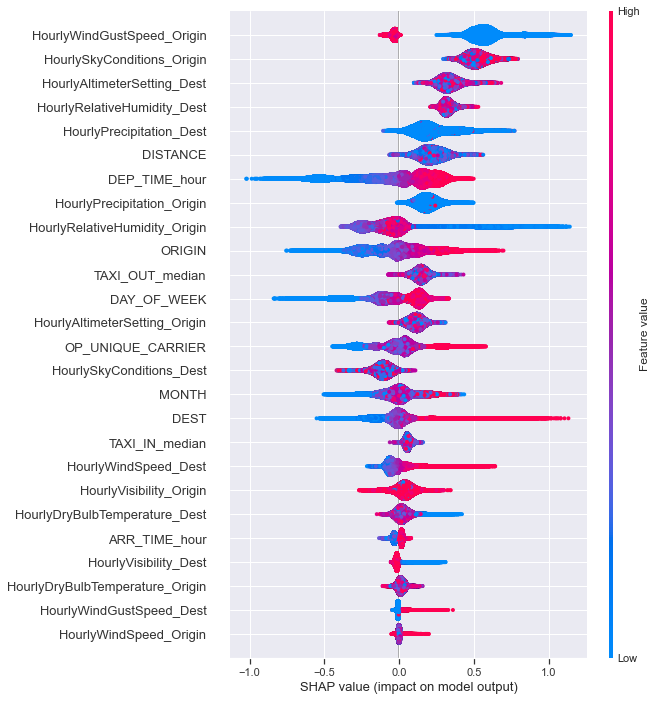

In [12]:
shap.summary_plot(shap_values, X_test_transformed, max_display=X_test_transformed.shape[1], show=False)
plt.savefig(fname='shap_summaryPlot.png', bbox_inches='tight', pad_inches=0.1)

### Shap Values for One Prediction

In [13]:
# load JS visualization code to notebook
shap.initjs()

idx = 1
shap.force_plot(explainer.expected_value, shap_values[idx, :], X_test.iloc[idx, :])

___

### Save Explainer and SHAP values into files

In [14]:
import joblib

explainer_filename = 'shap_treeExplainer.bz2'
joblib.dump(explainer, filename=explainer_filename, compress=('bz2', 9))

['shap_treeExplainer.bz2']

In [15]:
joblib.dump(shap_values, filename='shap_treeExplainer_values.bz2', compress=('bz2', 9))

['shap_treeExplainer_values.bz2']

___

### Additional plots

In [16]:
import joblib

In [17]:
explainer = joblib.load('shap_treeExplainer.bz2')
shap_values = joblib.load('shap_treeExplainer_values.bz2')

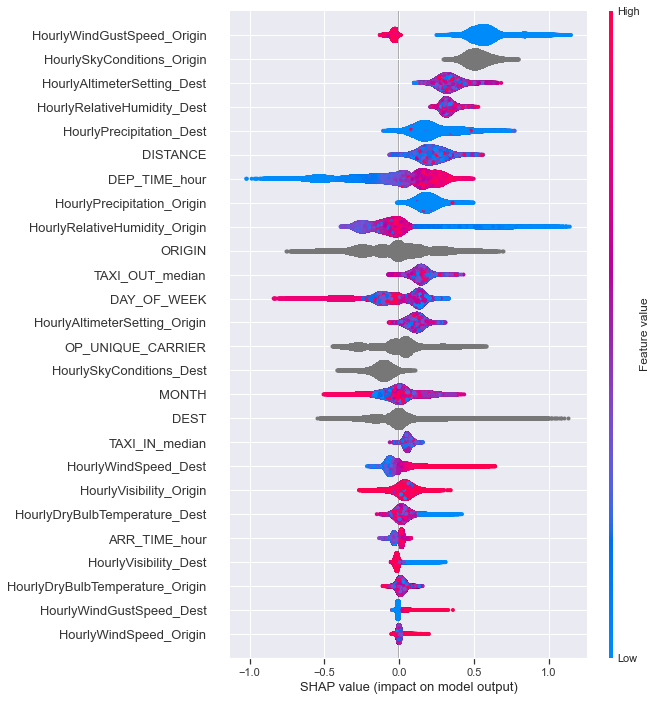

In [18]:
shap.summary_plot(shap_values, features=X_test, max_display=X_test.shape[1])

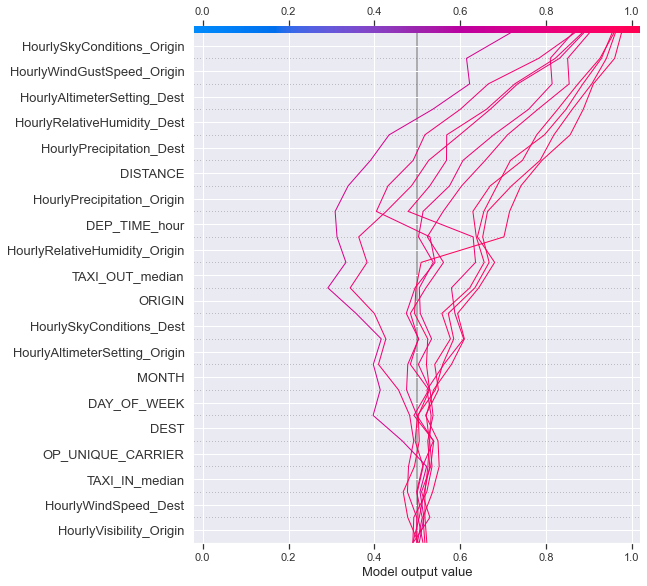

In [20]:
# Transform log odds to probabilities:
shap.decision_plot(base_value=explainer.expected_value, shap_values=shap_values[:10], features=X_test[:10], link='logit')

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


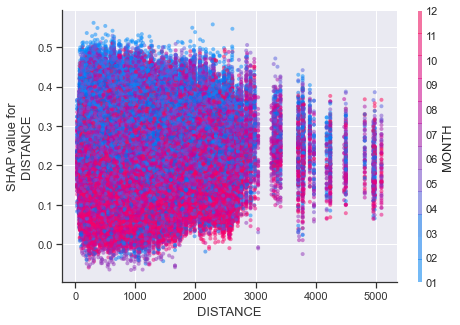

In [21]:
shap.dependence_plot(ind='DISTANCE', shap_values=shap_values, features=X_test, interaction_index='MONTH', alpha=0.5)

This can be interpreted as follows:
1. If we only focus on the majority of the flights, i.e. distances < 3000 mi,
2. We can observe that for the first half of the year distance has a higher positive impact on final prediction,
3. While in the second semester, distance presents a lower positive impact on final prediction

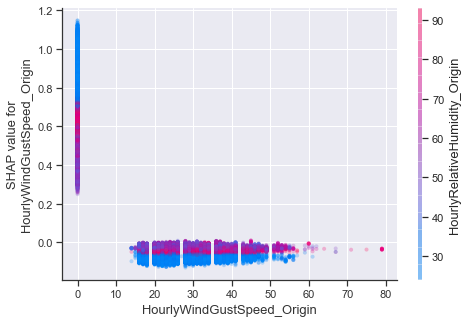

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


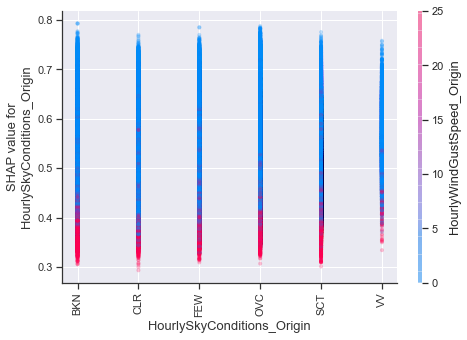

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


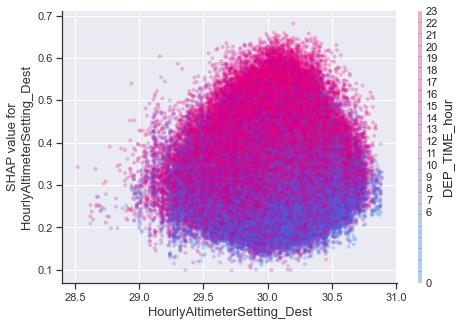

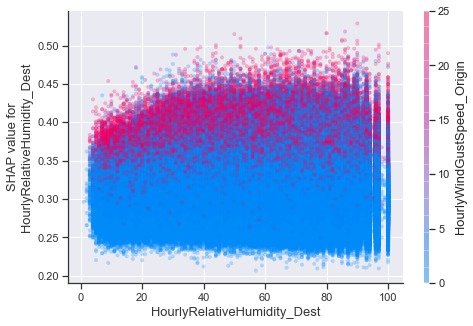

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


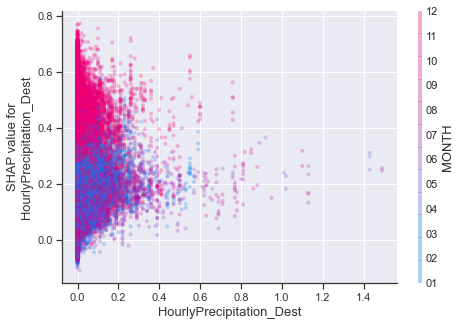

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


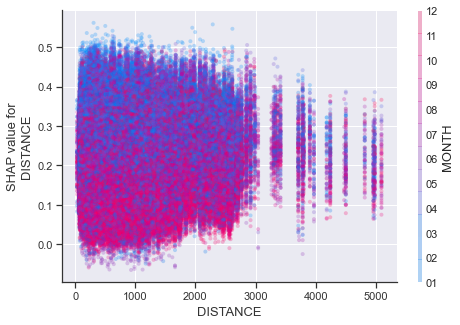

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


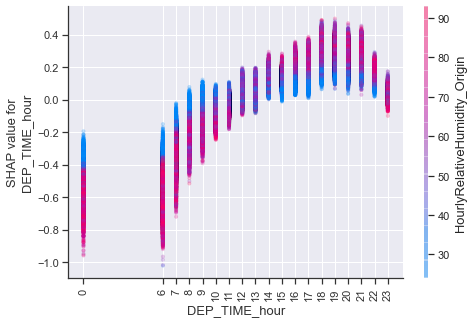

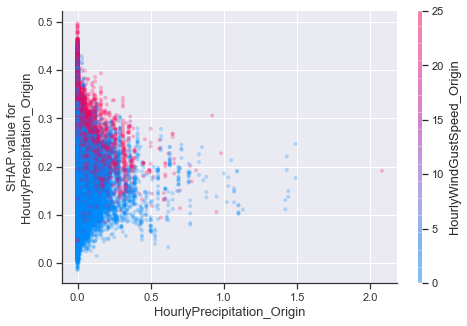

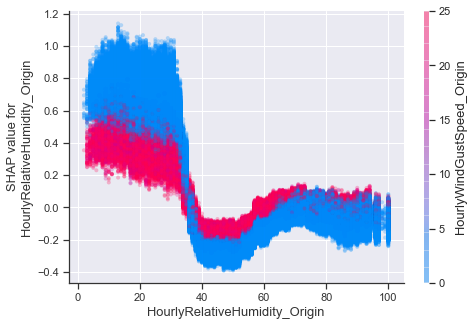

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


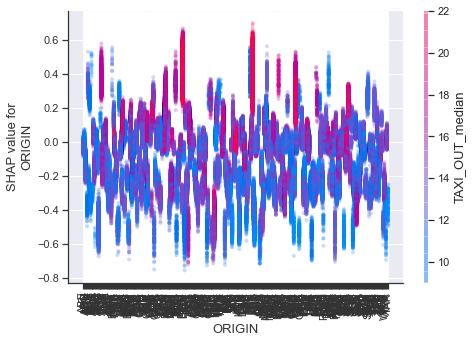

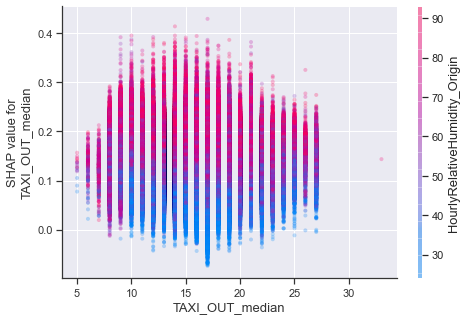

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


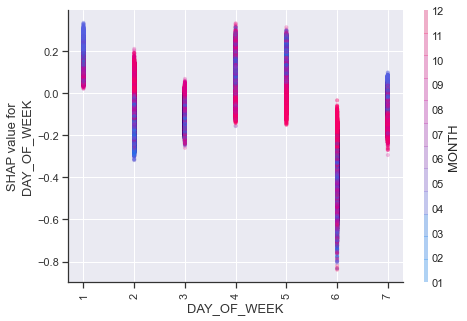

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


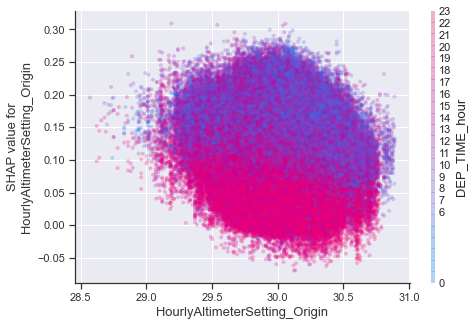

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


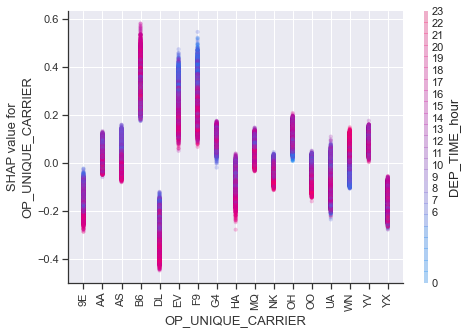

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


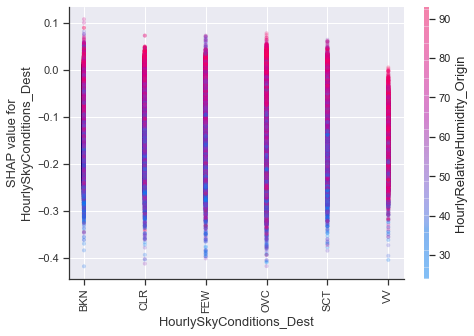

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


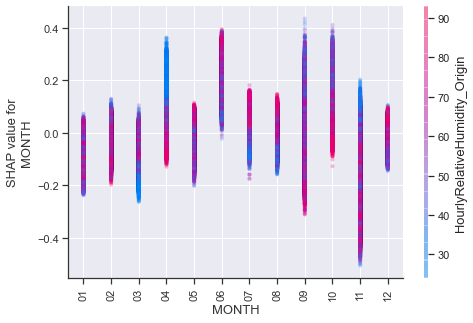

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


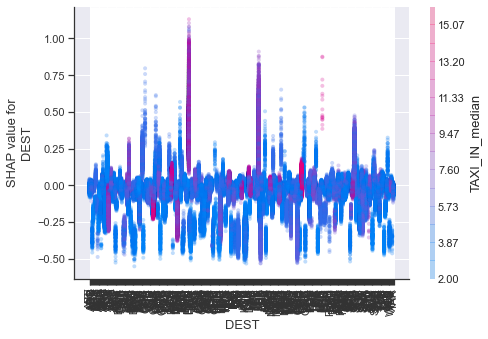

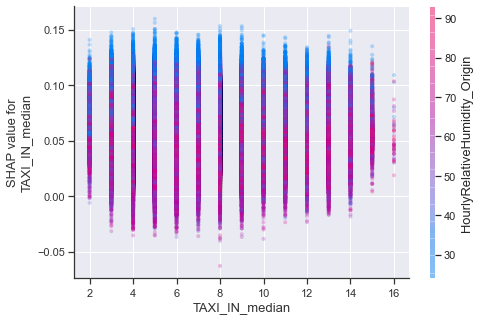

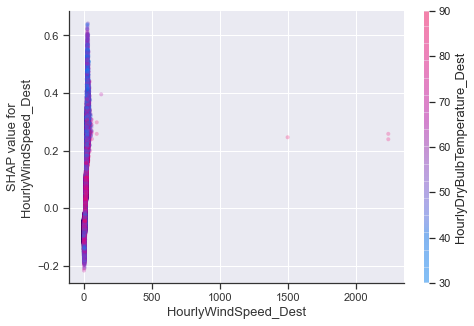

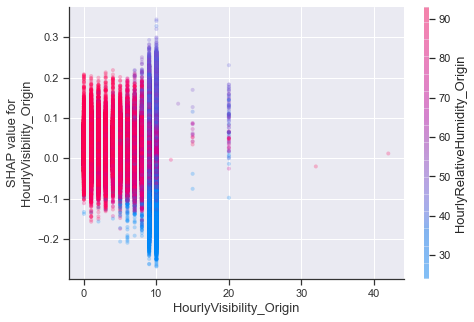

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


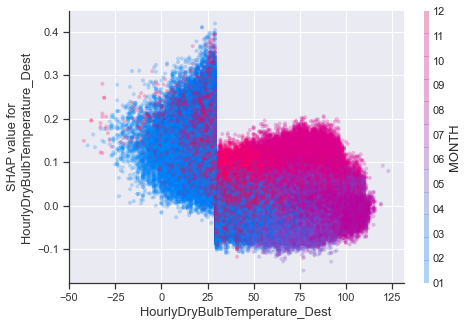

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


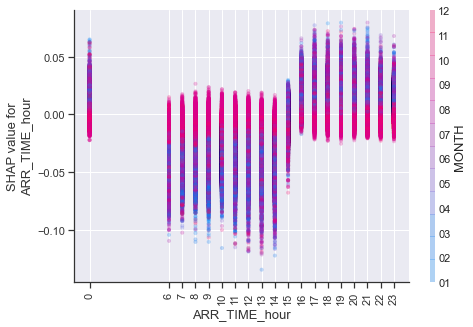

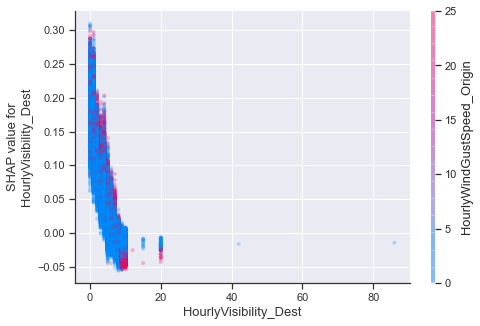

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


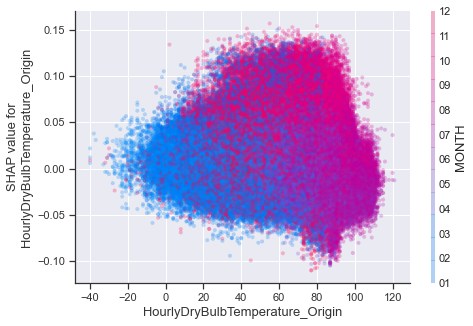

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


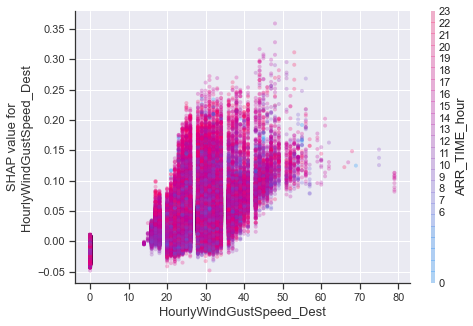

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


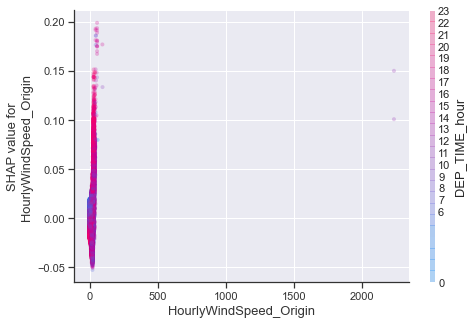

In [22]:
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(X_test.shape[1]):
    shap.dependence_plot(top_inds[i], shap_values, X_test, interaction_index='auto', alpha=0.25)

In [23]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], link='logit')

In [24]:
shap.force_plot(explainer.expected_value, shap_values[:10,:], X_test.iloc[:10,:])

### Memory plot

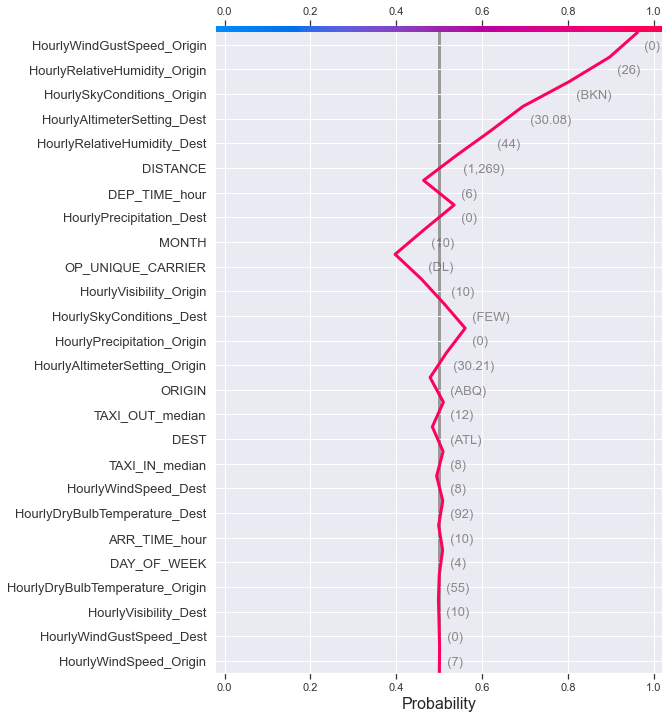

In [25]:
# i = np.random.choice(range(0, X_test.shape[0])) # To run different tests
i = X_test.index.get_loc(2071342) # To replicate the example of the memory
shap.decision_plot(base_value=explainer.expected_value, shap_values=shap_values[i,:],
                   features=X_test.iloc[i,:], link='logit', feature_display_range=slice(None, -X_test.shape[1]-1, -1),
                   return_objects=True, show=False, y_demarc_color='#E9E9F1') # #E9E9F1 is seaborn's dark-grid facecolor
fig = plt.gcf()
ax = plt.gca()
ax.set_xlabel('Probability', fontsize=16)
# ax.grid(axis='both', linestyle='-', linewidth=0.25)
for ln in ax.lines:
    ln.set_linewidth(3)
import matplotlib
for text in ax.texts:
    text.set_alpha(0.75)
plt.savefig(fname='shap_decisionPlot.png', bbox_inches='tight', pad_inches=0.1)    

### Frontend plot

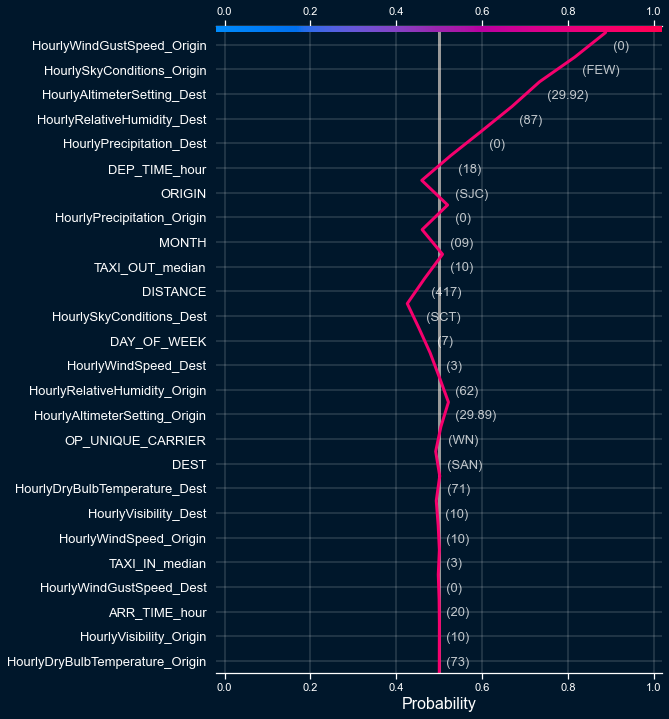

In [26]:
shap.decision_plot(base_value=explainer.expected_value, shap_values=shap_values[0],
                  features=X_test.iloc[0,:], link='logit', feature_display_range=slice(None, -X_test.shape[1]-1, -1),
                  return_objects=True, show=False, y_demarc_color='#00172b')
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#00172b')
ax.set_facecolor('#00172b')
ax.set_xlabel('Probability', fontsize=16, color='white')
ax.tick_params(axis='both', colors='white')
ax.grid(axis='both', color='white', linestyle='-', linewidth=0.25)
for ln in ax.lines:
    ln.set_linewidth(3)
import matplotlib
for text in ax.texts:
    text.set_color('white')
    text.set_alpha(0.75)